In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
dataset=pd.read_csv('Mall_Customers.csv')
X=dataset.iloc[:,3:].values
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


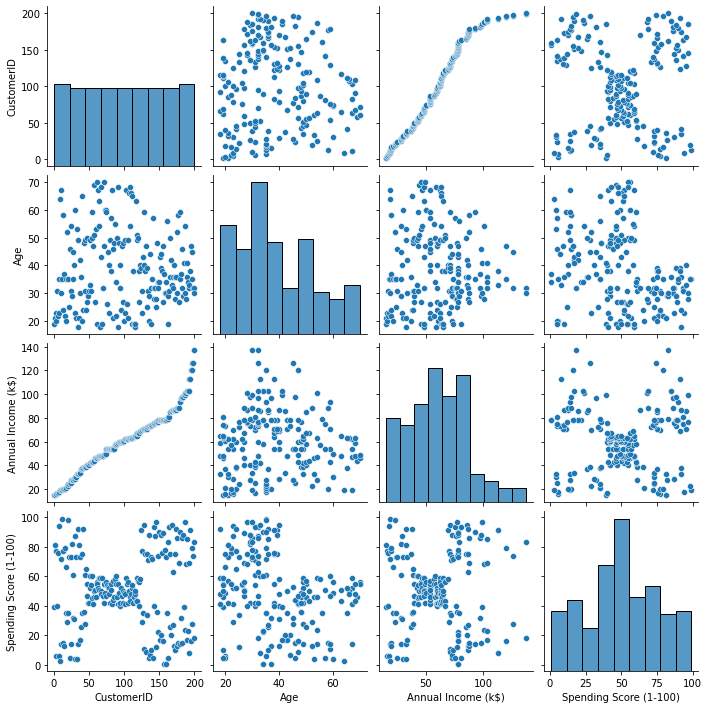

In [6]:
sns.pairplot(dataset)

<AxesSubplot:>

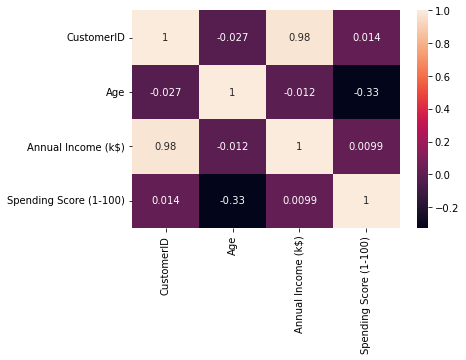

In [8]:
sns.heatmap(dataset.corr(),annot=True)

In [9]:
dataset.isnull()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


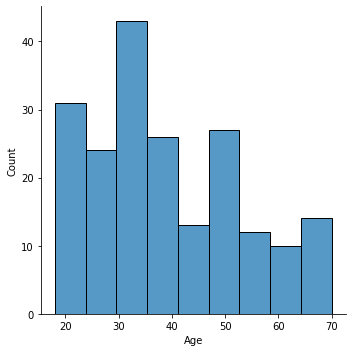

In [10]:
sns.displot(dataset['Age'])

<AxesSubplot:xlabel='Genre', ylabel='count'>

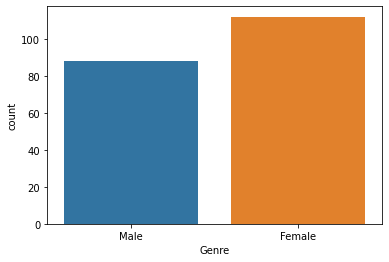

In [12]:
sns.countplot(data=dataset,x='Genre')

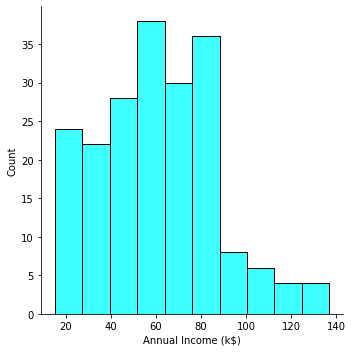

In [17]:
sns.displot(dataset['Annual Income (k$)'],color='cyan')

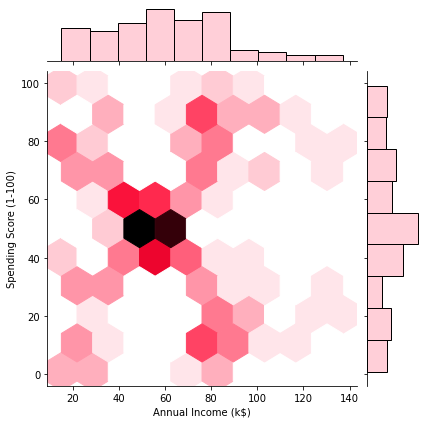

In [22]:
sns.jointplot(data=dataset,x='Annual Income (k$)',y='Spending Score (1-100)',kind='hex',color='pink')

<AxesSubplot:xlabel='Age', ylabel='Genre'>

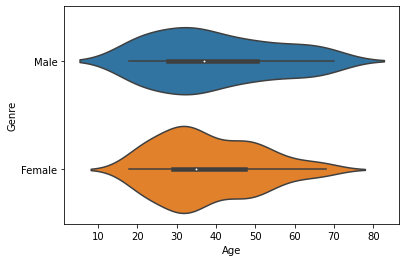

In [25]:
sns.violinplot(x="Age", y="Genre",data=dataset)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Genre'>

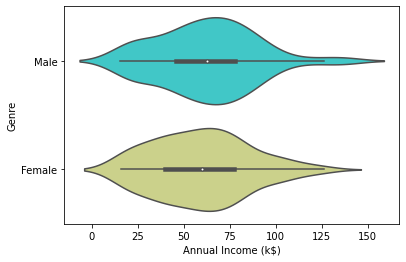

In [30]:
sns.violinplot(x='Annual Income (k$)', y="Genre",data=dataset,palette='rainbow')

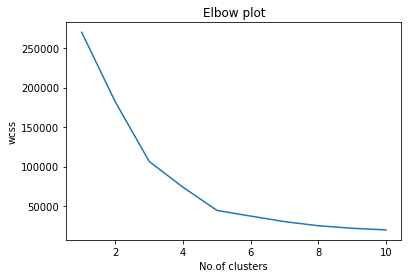

In [31]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow plot')
plt.xlabel('No.of clusters')
plt.ylabel('wcss')
plt.show()

In [32]:
kmeans=KMeans(n_clusters=5,init='k-means++')

In [33]:
kmeans.fit(X)

KMeans(n_clusters=5)

In [35]:
y_pred=kmeans.predict(X)

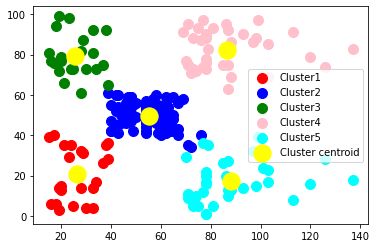

In [38]:
plt.scatter(X[y_pred==0,0],X[y_pred==0,1],s=100,c='red',label='Cluster1')
plt.scatter(X[y_pred==1,0],X[y_pred==1,1],s=100,c='blue',label='Cluster2')
plt.scatter(X[y_pred==2,0],X[y_pred==2,1],s=100,c='green',label='Cluster3')
plt.scatter(X[y_pred==3,0],X[y_pred==3,1],s=100,c='pink',label='Cluster4')
plt.scatter(X[y_pred==4,0],X[y_pred==4,1],s=100,c='cyan',label='Cluster5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Cluster centroid')
plt.legend()
plt.show()

In [43]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram

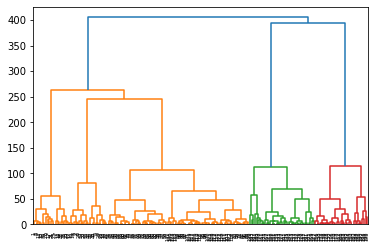

In [47]:
dendro=dendrogram(sch.linkage(X,method = 'ward'))

In [48]:
from sklearn.cluster import AgglomerativeClustering

In [49]:
agg=AgglomerativeClustering(n_clusters=5,affinity='euclidean')

In [50]:
agg.fit(X)

AgglomerativeClustering(n_clusters=5)

In [52]:
y_agg=agg.fit_predict(X)

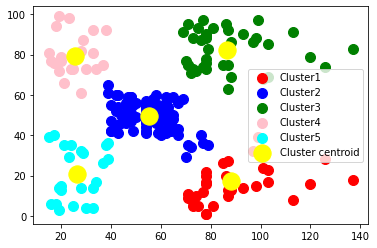

In [53]:
plt.scatter(X[y_agg==0,0],X[y_agg==0,1],s=100,c='red',label='Cluster1')
plt.scatter(X[y_agg==1,0],X[y_agg==1,1],s=100,c='blue',label='Cluster2')
plt.scatter(X[y_agg==2,0],X[y_agg==2,1],s=100,c='green',label='Cluster3')
plt.scatter(X[y_agg==3,0],X[y_agg==3,1],s=100,c='pink',label='Cluster4')
plt.scatter(X[y_agg==4,0],X[y_agg==4,1],s=100,c='cyan',label='Cluster5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Cluster centroid')
plt.legend()
plt.show()